In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('test_set.csv', parse_dates= ['time'], index_col= 'time')

In [4]:
data

,price
time,
2020-01-01 22:00:00+00:00,1.121325
2020-01-01 22:05:00+00:00,1.121250
2020-01-01 22:10:00+00:00,1.121250
2020-01-01 22:15:00+00:00,1.121460
2020-01-01 22:20:00+00:00,1.121540
...,...
2020-08-30 23:35:00+00:00,1.190895
2020-08-30 23:40:00+00:00,1.191240
2020-08-30 23:45:00+00:00,1.191515


In [7]:
data['returns'] = np.log(data.div(data.shift(1)))

In [8]:
lags = 5
cols = []
for lag in range(1, lags+1):
    col = 'lag{}'.format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace= True)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lm = LinearRegression(fit_intercept= True)

In [12]:
lm.fit(data[cols], data.returns)

LinearRegression()

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
data['predictions'] = lm.predict(data[cols].values)

In [16]:
data.predictions = np.sign(data.predictions)

In [17]:
data.predictions.value_counts()

 1.0    28311
-1.0    21050
Name: predictions, dtype: int64

In [18]:
hits = np.sign(data.predictions * data.returns).value_counts()
hits

 1.0    25172
-1.0    23577
 0.0      612
dtype: int64

In [19]:
hit_ratio = hits[1.0]/sum(hits)
hit_ratio # percentage of correctly predicted market returns

0.5099572537023156

In [20]:
data['strategy'] = data.predictions * data.returns

In [21]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

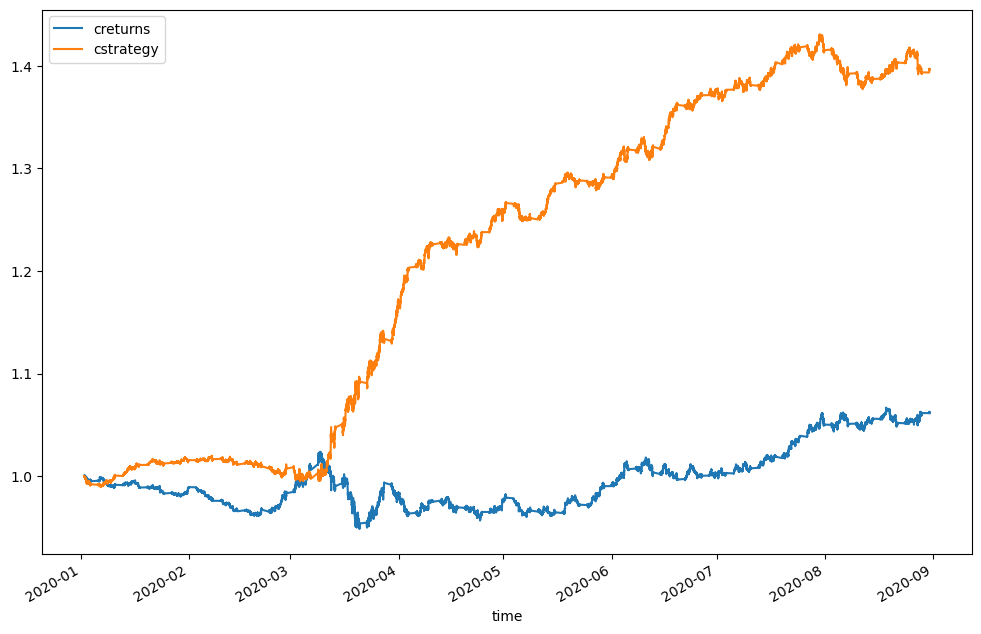

In [22]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [23]:
data["trades"] = data.predictions.diff().fillna(0).abs()

In [24]:
data.trades.value_counts()

0.0    32515
2.0    16846
Name: trades, dtype: int64